<a href="https://colab.research.google.com/github/ipark3/Hank-Ian/blob/main/GitHub%20Project/dataset/code/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


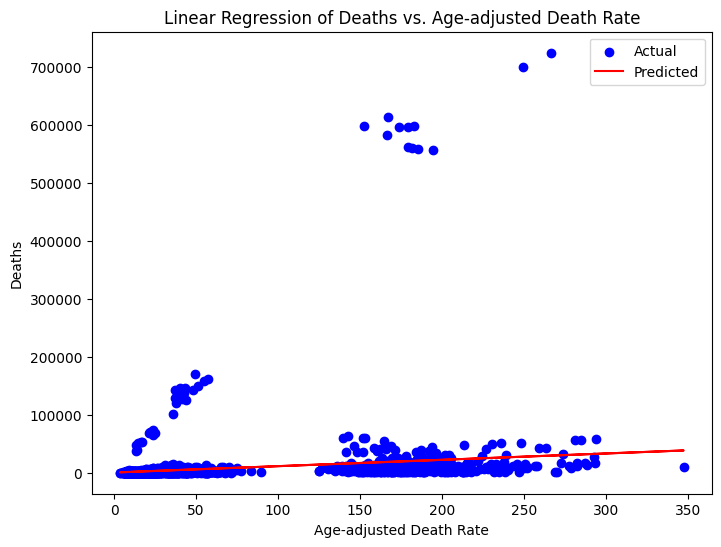

In [39]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Personal/NCHS_-_Leading_Causes_of_Death__United_States.csv')


# Linear Regression Section
# Filter for rows with Age-adjusted Death Rate and Deaths values, dropping missing values
filtered_df = filtered_df[['Age-adjusted Death Rate', 'Deaths']].dropna()

# Define predictor and target variables
X = filtered_df[['Age-adjusted Death Rate']]
y = filtered_df['Deaths']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot regression results
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Age-adjusted Death Rate')
plt.ylabel('Deaths')
plt.title('Linear Regression of Deaths vs. Age-adjusted Death Rate')
plt.legend()
plt.show()

As you can see the blue points reflect the actual data of Deaths for a Age-adjusted Death Rate. the fact that the line is flat can help indicate that this model might not help this dataset.

The higher levels of points or outliers hurts this dataset example.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-31-68ed5d59e54f>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  clean_data = df[selected_columns].replace('..', np.nan).dropna().astype(float)


Mean Squared Error (MSE): 10.21405612906597
R-squared (R²): 0.9526216451844107


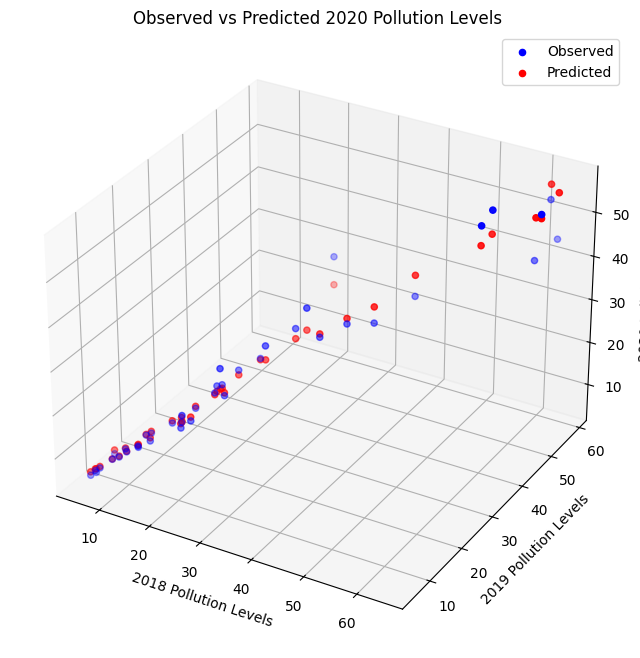

In [31]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Personal/P_Data_Extract_From_World_Development_Indicators.xlsx')
df.columns = df.columns.str.strip()

# Use columns from the years 2018, 2019 as features and 2020 as the target
selected_columns = ['2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]']
clean_data = df[selected_columns].replace('..', np.nan).dropna().astype(float)

# Define features and target variable
X = clean_data[['2018 [YR2018]', '2019 [YR2019]']]
y = clean_data['2020 [YR2020]']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

# 3D Plot for observed vs predicted values
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for observed values
ax.scatter(X_test['2018 [YR2018]'], X_test['2019 [YR2019]'], y_test, color='blue', label='Observed')
# Scatter plot for predicted values
ax.scatter(X_test['2018 [YR2018]'], X_test['2019 [YR2019]'], y_pred, color='red', label='Predicted')

# Set labels
ax.set_xlabel('2018 Pollution Levels')
ax.set_ylabel('2019 Pollution Levels')
ax.set_zlabel('2020 Pollution Levels')
ax.set_title('Observed vs Predicted 2020 Pollution Levels')

# Legend
ax.legend()

plt.show()

The blue dots in the graph show what the years levels of pollution was and the red dots show what was predicted to be.

As you can see throught the growing years there were higher levels of pollution as the graph trails higher.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.9512195121951219
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        22
         1.0       0.90      1.00      0.95        19

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.96      0.95      0.95        41



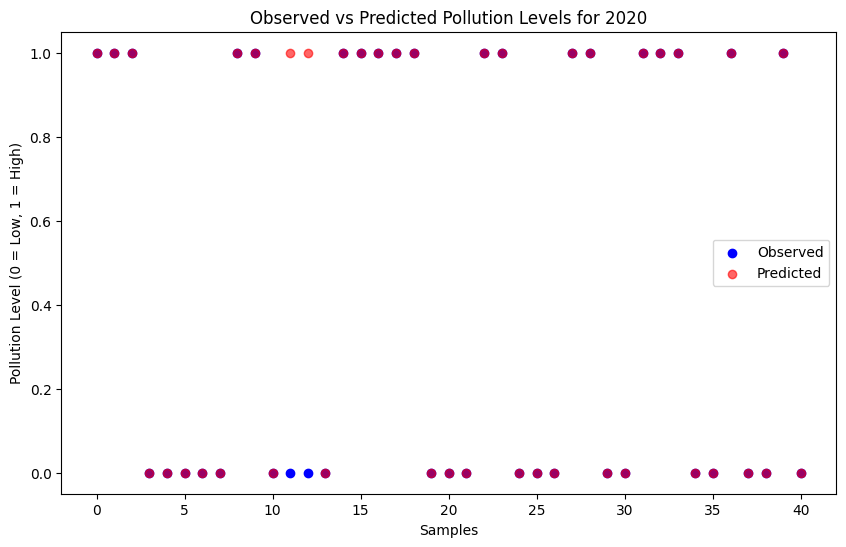

In [36]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Personal/P_Data_Extract_From_World_Development_Indicators.xlsx')
df.columns = df.columns.str.strip()

# Set the future behavior to avoid the warning
pd.set_option('future.no_silent_downcasting', True)


# Set a threshold for binary classification on the "2020 [YR2020]" column
threshold_2020 = 20.0  # Define high pollution as values above 20.0
df['Pollution_Level_2020'] = (df['2020 [YR2020]'].replace('..', np.nan).astype(float) > threshold_2020).astype(int)

# Select relevant features and target variable
# Use data from years 2018 and 2019 as features for predicting 2020 pollution level
selected_columns = ['2018 [YR2018]', '2019 [YR2019]', 'Pollution_Level_2020']
cleaned_df = df[selected_columns].replace('..', np.nan).dropna().astype(float)

# Define features (X) and target (y)
X = cleaned_df[['2018 [YR2018]', '2019 [YR2019]']]
y = cleaned_df['Pollution_Level_2020']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Observed')
plt.scatter(range(len(y_pred)), y_pred, color='red', alpha=0.6, label='Predicted')
plt.xlabel('Samples')
plt.ylabel('Pollution Level (0 = Low, 1 = High)')
plt.title('Observed vs Predicted Pollution Levels for 2020')
plt.legend()
plt.show()

The blue and red dots being in the same coloumn shows that the model is effectivley showing the high and lows of the pollution levels.